In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
from matplotlib import pyplot as plt # inline outputs plots inline in the console
plt.style.use('ggplot')
import seaborn as sns

wine = pd.read_csv('winequality-red.csv')

In [2]:
wine['quality'] = pd.cut(wine.quality,bins=[0,5.9,6.1,10],labels=["bad","normal","good"])

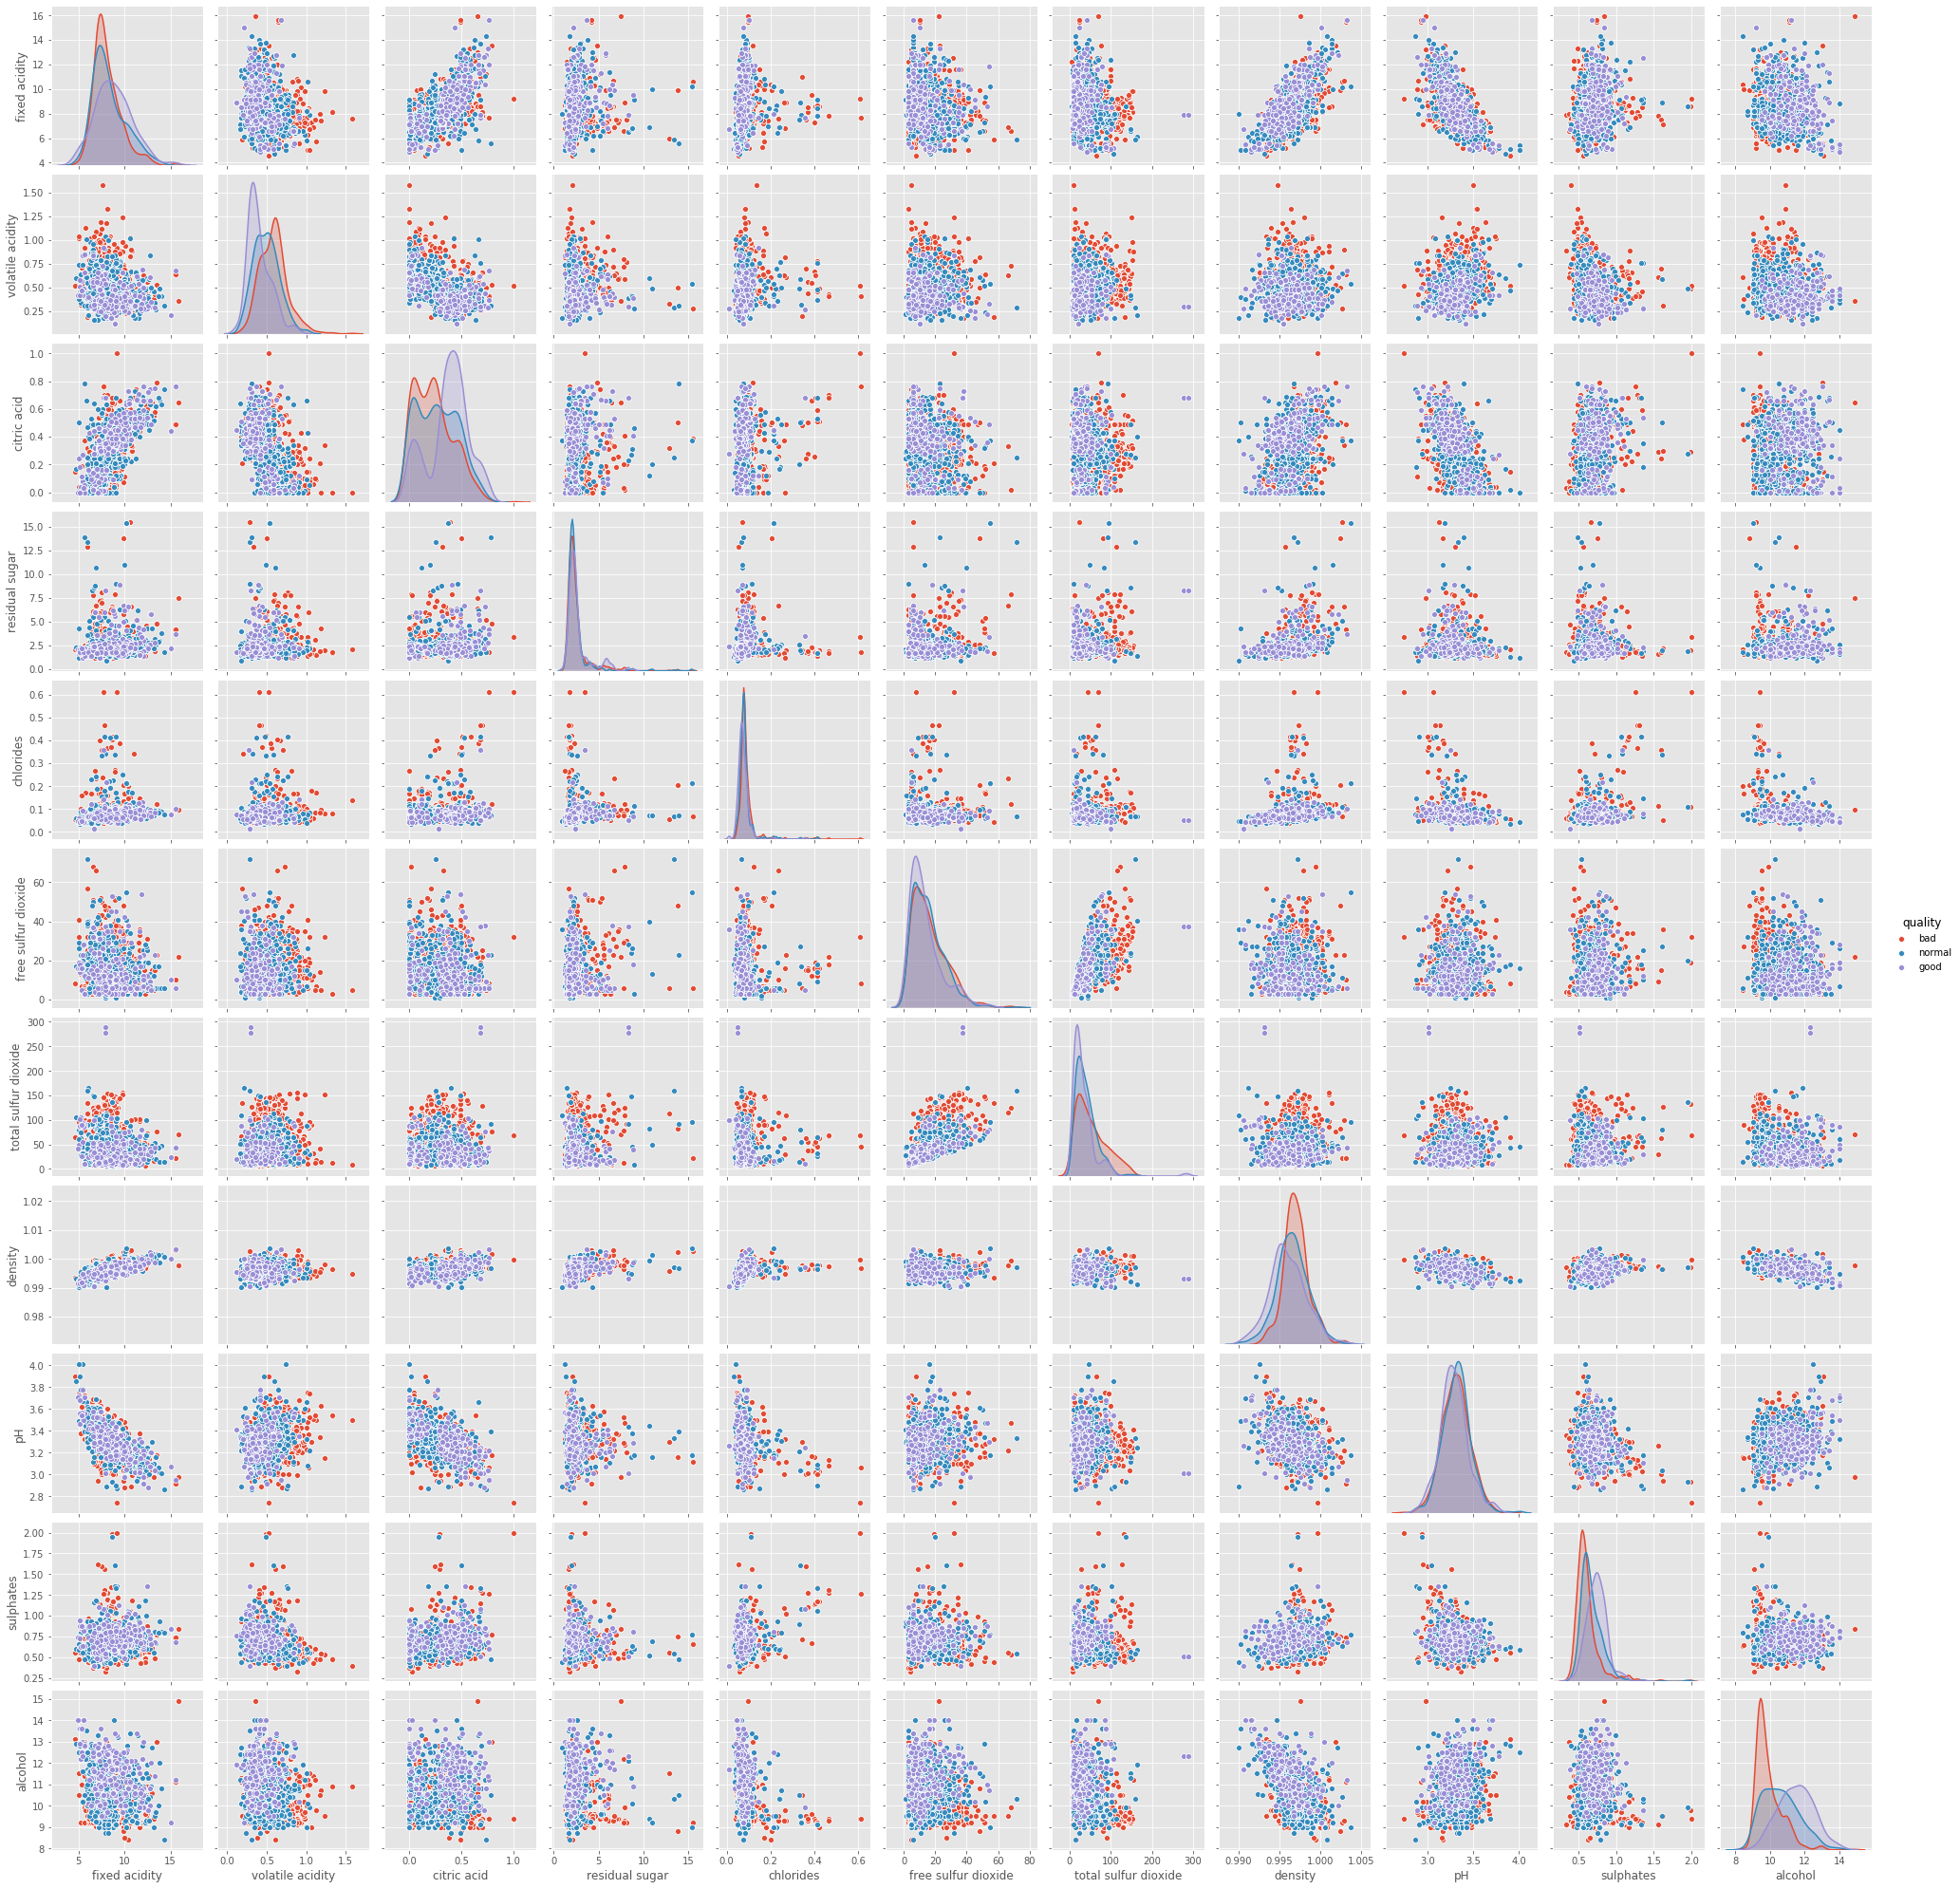

In [4]:
sns.pairplot(wine,hue="quality")

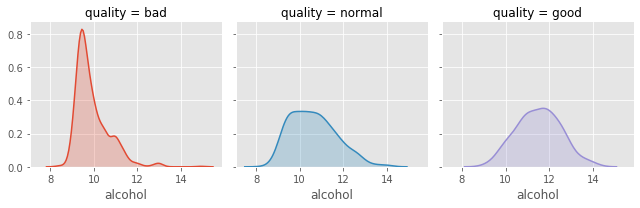

In [154]:
fct = sns.FacetGrid(wine, col = 'quality', hue = 'quality', col_wrap = 3)
fct.map(sns.distplot, "alcohol", hist = False, kde = True,  kde_kws = {'shade': True, 'linewidth': 1.5})

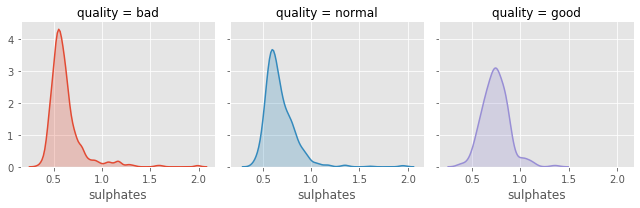

In [158]:
fct = sns.FacetGrid(wine, hue = 'quality', col = 'quality', col_wrap = 3)
fct.map(sns.distplot, "sulphates", hist = False, kde = True, 
        kde_kws = {'shade': True, 'linewidth': 1.5})

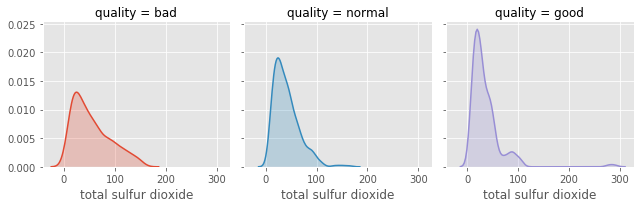

In [159]:
fct = sns.FacetGrid(wine, hue = 'quality', col = 'quality', col_wrap = 3)
fct.map(sns.distplot, "total sulfur dioxide", hist = False, kde = True, 
        kde_kws = {'shade': True, 'linewidth': 1.5})

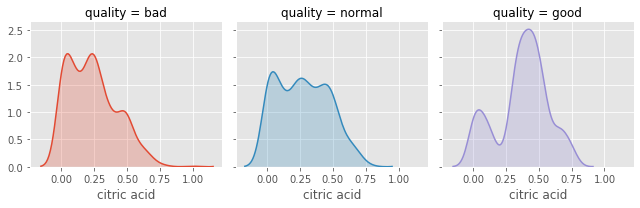

In [160]:
fct = sns.FacetGrid(wine, col = 'quality', hue = 'quality', col_wrap = 3)
fct.map(sns.distplot, "citric acid", hist = False, kde = True,  kde_kws = {'shade': True, 'linewidth': 1.5})

In [5]:
target = wine['quality']
wine.drop('quality',axis=1,inplace=True)

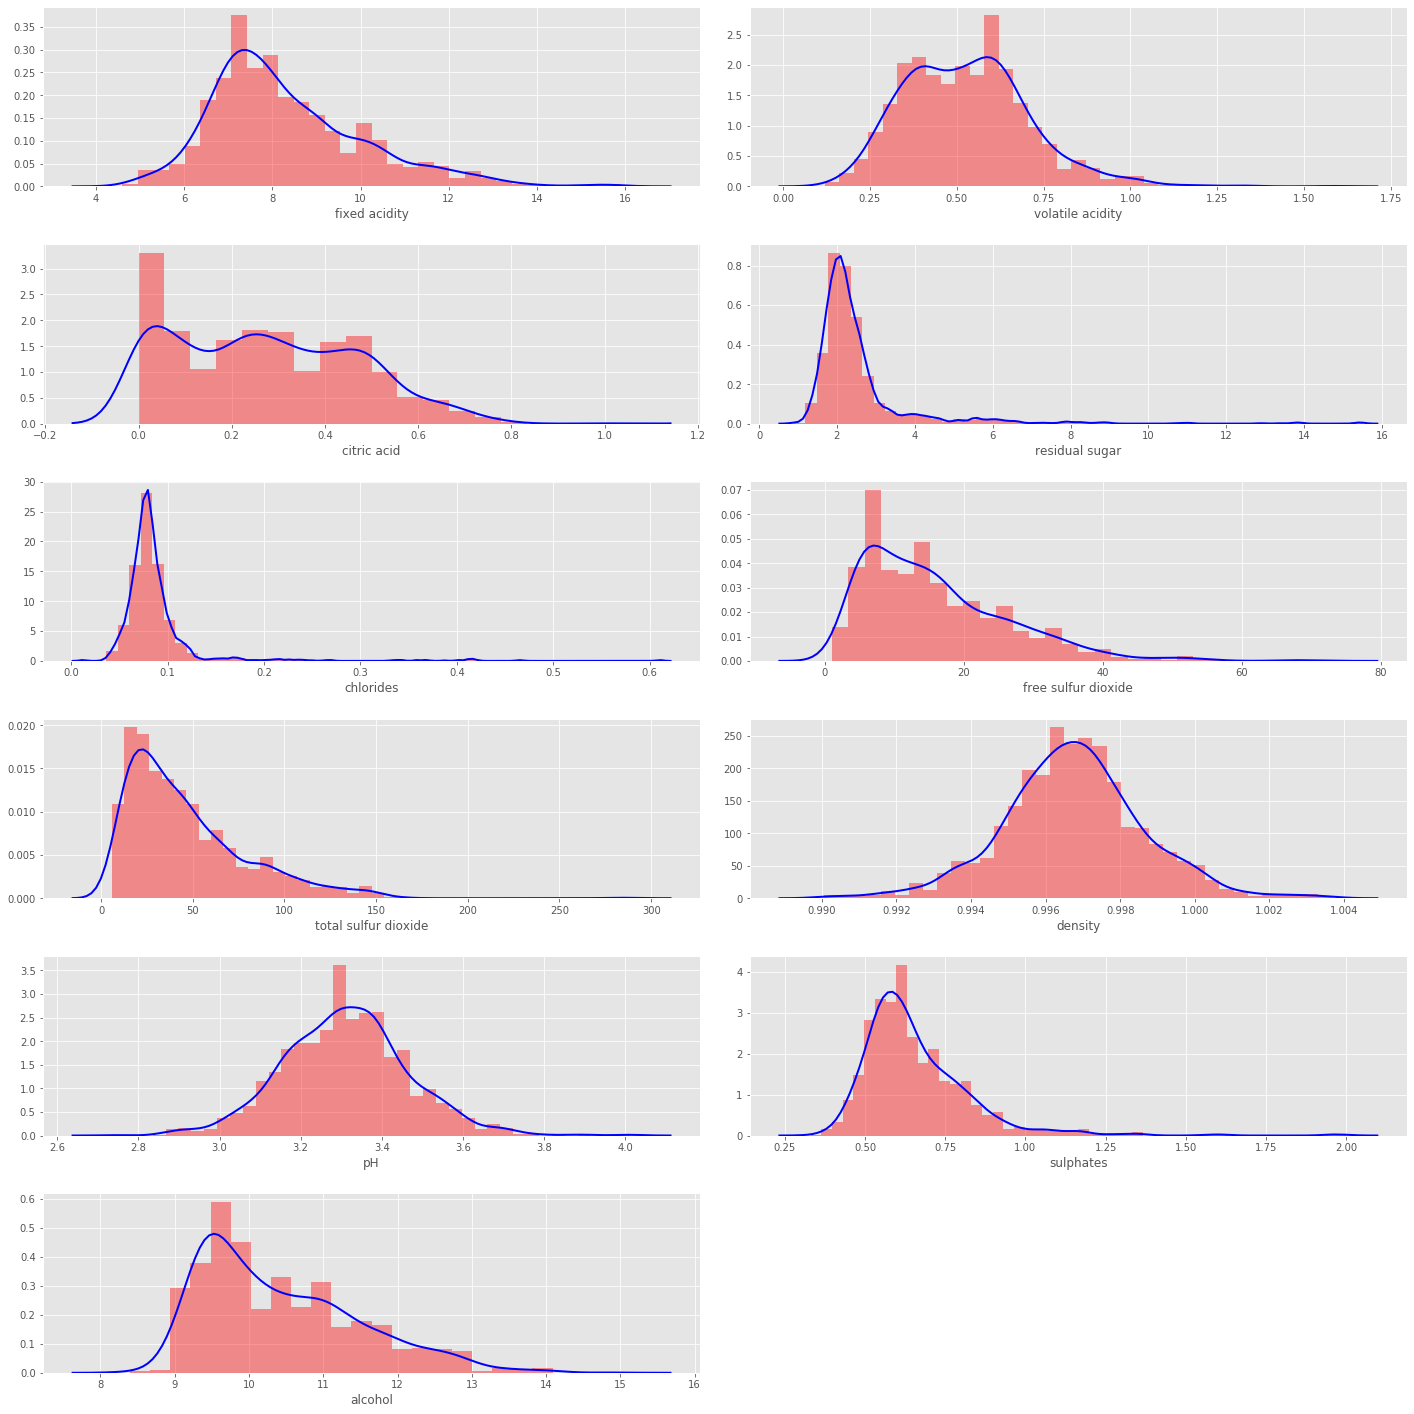

In [6]:
fig = plt.figure(figsize=(20,20))
for index,column in enumerate(list(wine.columns)):
    plt.subplot(6,2,index+1)
    sns.distplot(wine.loc[:, column], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
fig.tight_layout(pad = 2)

In [7]:
wine_std = wine.copy()
# standardize the data
for column in wine_std.columns:
    col_mean, col_sd = wine_std[column].mean(), wine_std[column].std()
    wine_std[column] = (wine_std[column] - col_mean) / col_sd

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
pd.set_option('display.float_format', '{:.5f}'.format)

In [13]:
Xtrain,Xtest,ytrain,ytest = train_test_split(wine, target, stratify=target)
X1train,X1test,y1train,y1test = train_test_split(wine_std, target, stratify=target)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(max_iter=1000,class_weight='balanced',cv=5)

In [16]:
logit.fit(X1train,y1train)
print(logit.C_)
print(logit.classes_)
print(f"Training accuracy:{logit.score(X1train,y1train)}")
print(f"Test accuracy: {logit.score(X1test,y1test)}")

[0.04641589 0.04641589 0.04641589]
['bad' 'good' 'normal']
Training accuracy:0.5954962468723937
Test accuracy: 0.63


In [140]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(logit.predict(X1test),y1test)

array([[140,   5,  46],
       [ 10,  41,  43],
       [ 36,   8,  71]])

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [90]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [93]:
params = {'class_weight':[None,"balanced"],'max_features':[None,"sqrt",5],'max_depth':[None,3,4,5],
         'min_samples_split':[2,20,50,100]}
grid_test = GridSearchCV(tree,param_grid=params,cv=5,return_train_score=True,verbose=1)
grid_test.fit(Xtrain,ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [None, 'sqrt', 5],
                         'min_samples_split': [2, 20, 50, 100]},
             return_train_score=True, verbose=1)

In [94]:
grid_test.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 5,
 'min_samples_split': 2}

In [97]:
results = pd.DataFrame(grid_test.cv_results_)
results[['param_class_weight','param_max_depth','param_max_features','mean_test_score','mean_train_score']].sort_values('mean_test_score',ascending=False).T

,56,48,8,4,0,52,38,39,6,47,...,70,89,16,76,67,79,54,55,64,65
param_class_weight,balanced,balanced,None,None,None,balanced,None,None,None,None,...,balanced,balanced,None,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_max_depth,None,None,None,None,None,None,5,5,None,5,...,3,5,3,4,3,4,None,None,3,3
param_max_features,5,None,5,sqrt,None,sqrt,None,None,sqrt,5,...,5,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt
mean_test_score,0.67308,0.64217,0.63965,0.63884,0.63302,0.63221,0.62300,0.61969,0.61885,0.61884,...,0.55212,0.55212,0.55211,0.54960,0.54879,0.54711,0.54211,0.53711,0.52706,0.51546
mean_train_score,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.69683,0.67097,0.71893,0.66868,...,0.58465,0.62844,0.58903,0.58820,0.55650,0.55984,0.67098,0.59758,0.55005,0.56567


In [111]:
tree.set_params(class_weight='balanced',max_features="sqrt",max_depth=5)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt')

In [112]:
tree.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt')

In [113]:
tree.score(Xtrain,ytrain)

0.6163469557964971

In [114]:
tree.score(Xtest,ytest)

0.5375

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier()
rfc_params = {'n_estimators':[10,50,100], 
              'max_features':["auto","sqrt"], 
              'max_depth':[2,4],
              'min_samples_split':[2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True,False]}
grid = GridSearchCV(estimator = rfc, param_grid = rfc_params, cv=3)

In [121]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]})

In [124]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [130]:
pd.DataFrame(grid.cv_results_)[['param_bootstrap','param_max_depth','param_max_features','param_min_samples_leaf',
                                'param_min_samples_split','param_n_estimators',
                                'mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
44,True,4,sqrt,2,2,100,0.65885
94,False,4,sqrt,2,5,50,0.65553
40,True,4,sqrt,1,5,50,0.65551
25,True,4,auto,1,2,50,0.65551
81,False,4,auto,2,5,10,0.65386
...,...,...,...,...,...,...,...
21,True,2,sqrt,2,5,10,0.59883
63,False,2,sqrt,1,5,10,0.59715
48,False,2,auto,1,2,10,0.59549
3,True,2,auto,1,5,10,0.59465


In [133]:
rfc = grid.best_estimator_
rfc.fit(Xtrain,ytrain)
rfc.score(Xtrain,ytrain)

0.7114261884904087

In [134]:
rfc.score(Xtest,ytest)

0.6125

# K Nearest Neighbors

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn = KNeighborsClassifier()

In [143]:
knn.fit(X1train,y1train)

KNeighborsClassifier()

In [144]:
knn.score(X1train,y1train)

0.7272727272727273

In [146]:
knn.score(X1test,y1test)

0.5675

In [147]:
confusion_matrix(knn.predict(X1test),y1test)

array([[125,   9,  53],
       [  9,  19,  24],
       [ 52,  26,  83]])